In [ ]:
from google.collab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.collab'

# Importing necessory libraries

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
from wordcloud import WordCloud
from sklearn.naive_bayes import GaussianNB
#Text Preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

#SKlearn feature extraction
from sklearn.feature_extraction.text import CountVectorizer  # BOW
from sklearn.feature_extraction.text import TfidfVectorizer  #TF-IDF

#Data Preprocessing & Model building
from sklearn.model_selection import train_test_split

#Model evolution
from sklearn.metrics import accuracy_score, classification_report

#Visualization (optional but usefull)
import matplotlib.pyplot as plt #for plotting
import seaborn as sns # for beautiful visualization

#progress bar for loops and apply
from tqdm import tqdm # to visually track long operations
tqdm.pandas()         #enable progress_apply() in pandas

#Download NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')   #for lammatizer
nltk.download('omw-1.4')#optional:to support multiple langiage in lamitize

nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **Data Loading**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path="/content/drive/MyDrive/Dataset TF/True.csv"
true_news=pd.read_csv(path, sep=',')
true_news.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true_news.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake=pd.read_csv("/content/drive/MyDrive/Dataset TF/Fake (2).csv")
fake.head()


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


# Adding Target Variable that is label having values 1 for true news and 0 for fake news

In [ ]:
true_news['label']=1
fake['label']=0

# Merging of data

In [ ]:
news=pd.concat([true_news,fake])
news = news.sample(frac = 1).reset_index(drop=True)
news

,title,text,subject,date,label
0,Racist North Carolina Hospital Volunteer Lose...,Republicans claim that racism doesn t exist an...,News,"April 16, 2016",0
1,Weird: Ted Cruz Fantasizes About Spanking Hil...,Ted Cruz again showed that his campaign is wei...,News,"January 8, 2016",0
2,U.S. military says airstrikes kill five al Qae...,WASHINGTON (Reuters) - The U.S. military said ...,worldnews,"December 8, 2017",1
3,German coalition watch: Merkel says compromise...,BERLIN (Reuters) - Chancellor Angela Merkel wo...,worldnews,"October 17, 2017",1
4,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION ...,You have got to be kidding me! After all the t...,Government News,"Sep 17, 2016",0
...,...,...,...,...,...
44893,DC Women’s March Aftermath: Streets Littered W...,21st Century Wire says So much for caring abou...,US_News,"January 23, 2017",0
44894,WATCH: New Documentary Explores Trump’s Russi...,This past week the world has been hit with man...,News,"May 16, 2017",0
44895,SARAH SANDERS…She Doesn’t Have Time For THIS! ...,Sarah Sanders is great at getting the White Ho...,politics,"Dec 27, 2017",0
44896,Romney: It's 'disqualifying' for Trump not to ...,WASHINGTON (Reuters) - Former U.S. Republican ...,politicsNews,"May 11, 2016",1


In [ ]:
news['label'].value_counts(normalize=True)

,proportion
label,
0,0.522985
1,0.477015


# Text cleaning

In [ ]:
def Clean(doc):
    # doc is a string of text

    # Lets define a regex to match special characters and digits

    regex = "[^a-zA-Z.]"
    doc = re.sub(regex," ",doc)

   #convert to lower case
    doc = doc.lower()

   #Tokenization
    tokens = nltk.word_tokenize(doc)

   #stop word removal
    stop_words = set(stopwords.words("english"))
    filtered_tokens = [word for word in tokens if word not in stop_words]

  # Lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]

  # join and return
    return " ".join( lemmatized_tokens)

In [ ]:
news['clean_text'] = news['text'].apply(lambda x:Clean(x))
news

,title,text,subject,date,label,clean_text
0,Racist North Carolina Hospital Volunteer Lose...,Republicans claim that racism doesn t exist an...,News,"April 16, 2016",0,republican claim racism exist anymore . true s...
1,Weird: Ted Cruz Fantasizes About Spanking Hil...,Ted Cruz again showed that his campaign is wei...,News,"January 8, 2016",0,ted cruz showed campaign weirder previous cons...
2,U.S. military says airstrikes kill five al Qae...,WASHINGTON (Reuters) - The U.S. military said ...,worldnews,"December 8, 2017",1,washington reuters u.s. military said friday c...
3,German coalition watch: Merkel says compromise...,BERLIN (Reuters) - Chancellor Angela Merkel wo...,worldnews,"October 17, 2017",1,berlin reuters chancellor angela merkel fourth...
4,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION ...,You have got to be kidding me! After all the t...,Government News,"Sep 17, 2016",0,got kidding time trump attacked democratic sid...
...,...,...,...,...,...,...
44893,DC Women’s March Aftermath: Streets Littered W...,21st Century Wire says So much for caring abou...,US_News,"January 23, 2017",0,st century wire say much caring environment in...
44894,WATCH: New Documentary Explores Trump’s Russi...,This past week the world has been hit with man...,News,"May 16, 2017",0,past week world hit many newsworthy story whit...
44895,SARAH SANDERS…She Doesn’t Have Time For THIS! ...,Sarah Sanders is great at getting the White Ho...,politics,"Dec 27, 2017",0,sarah sander great getting white house press c...
44896,Romney: It's 'disqualifying' for Trump not to ...,WASHINGTON (Reuters) - Former U.S. Republican ...,politicsNews,"May 11, 2016",1,washington reuters former u.s. republican pres...


In [ ]:
## Data is showing imbalnce betwwn true and fake articles

# Data Description

In [ ]:
news.shape

(44689, 6)

News have 44689 articles and 6 columns.

In [ ]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       44898 non-null  object
 1   text        44898 non-null  object
 2   subject     44898 non-null  object
 3   date        44898 non-null  object
 4   label       44898 non-null  int64 
 5   clean_text  44898 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.1+ MB


In [ ]:
news.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0
clean_text,0


In [ ]:
## There is no null values in the data

In [ ]:
# checking duplicate values
duplicates=news.duplicated().sum()

print("The number of duplicates are",duplicates)

clean=news.drop_duplicates(inplace=True)
print("news dataframe after duplicate removal is",clean)

The number of duplicates are 0
news dataframe after duplicate removal is None


In [ ]:
#There are no duplicate rows in the data.originally it was 209 rows were duplicates.

In [ ]:
news['subject'].value_counts()

,count
subject,
politicsNews,11272
worldnews,10145
News,9050
politics,6841
left-news,4459
Government News,1570
US_News,783
Middle-east,778


/tmp/ipython-input-115-3255089506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news, x='subject', order=news['subject'].value_counts().index,palette='Set2')


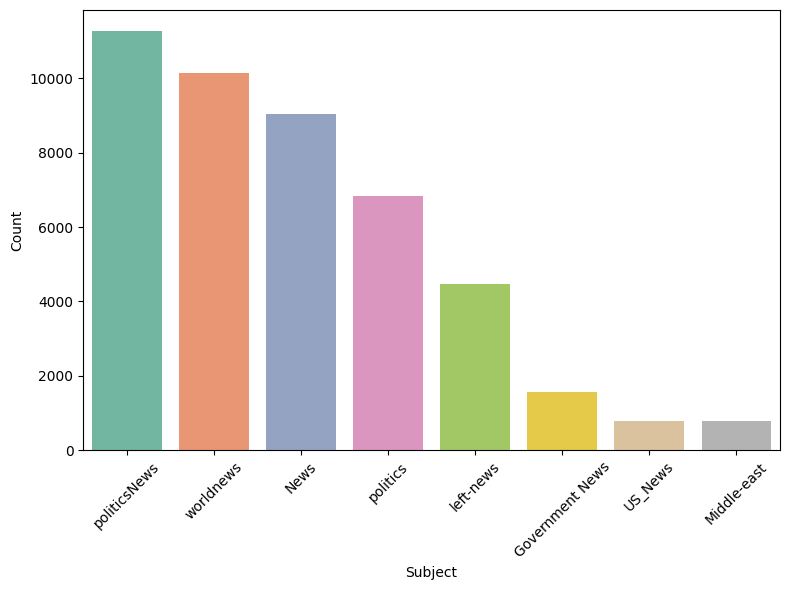

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=news, x='subject', order=news['subject'].value_counts().index,palette='Set2')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

There is top news subjects are politicsNews second is worldnews and news catrgories are highest.

/tmp/ipython-input-119-3713484970.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=news, x='label', order=news['label'].value_counts().index,palette='Set2')


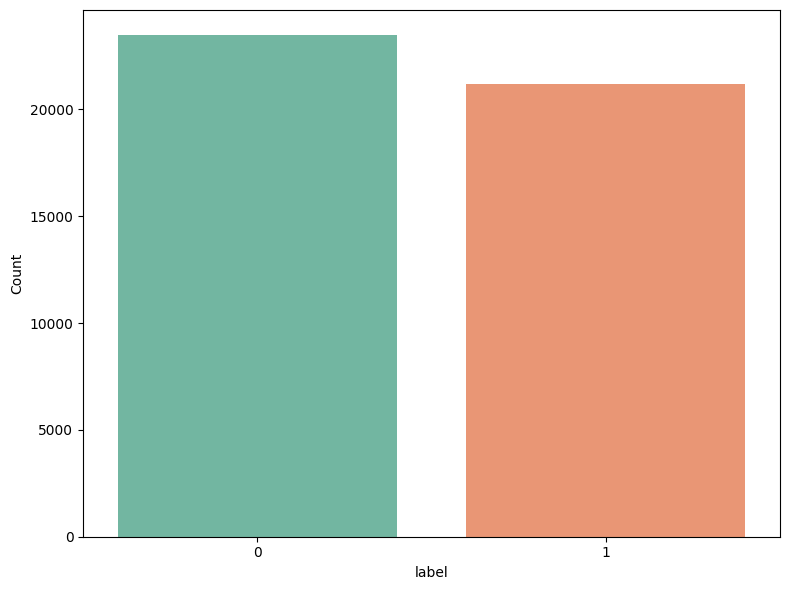

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=news, x='label', order=news['label'].value_counts().index,palette='Set2')
plt.xlabel('label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# count of top 20 words in unclean and clean text

In [ ]:
all_text = " ".join(news["text"].astype(str)).lower()
words = re.findall(r"\b\w+\b", all_text)

counter = Counter(words)
text_top20 = counter.most_common(20)

print(text_top20)

[('the', 1020104), ('to', 533606), ('of', 439482), ('a', 410968), ('and', 406890), ('in', 350573), ('s', 280896), ('that', 238893), ('on', 190807), ('for', 172454), ('is', 166074), ('trump', 133398), ('he', 132697), ('it', 132322), ('said', 131629), ('with', 117290), ('was', 115180), ('as', 104499), ('his', 95915), ('by', 95299)]


It gives count of each word in unclean text.It includes the shows highest count there after to and of.

In [ ]:
# Top 20 word count for clean articles

In [ ]:
all_text = " ".join(news["clean_text"].astype(str)).lower()
words = re.findall(r"\b\w+\b", all_text)

counter = Counter(words)
clean_top20 = counter.most_common(20)

print(clean_top20)

[('trump', 134233), ('said', 131629), ('u', 71087), ('state', 60272), ('president', 56813), ('would', 54814), ('s', 50852), ('people', 41832), ('year', 40977), ('republican', 39275), ('one', 39006), ('new', 31174), ('also', 31174), ('government', 29358), ('clinton', 29353), ('reuters', 29132), ('time', 28649), ('donald', 28172), ('obama', 28169), ('house', 28163)]


# Dataframe for unclean text

In [ ]:
word_df_text=pd.DataFrame(text_top20,columns=["words","count_of_words"])
word_df_text

,words,count_of_words
0,the,1020104
1,to,533606
2,of,439482
3,a,410968
4,and,406890
5,in,350573
6,s,280896
7,that,238893
8,on,190807
9,for,172454


<Axes: xlabel='count_of_words', ylabel='words'>

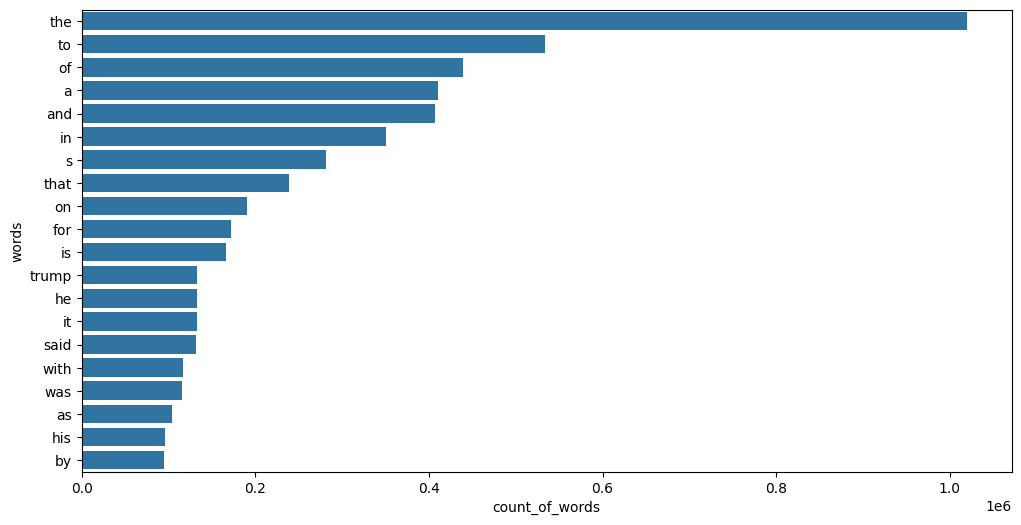

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=word_df_text,y='words',x='count_of_words')

# visualization of clean text

In [ ]:
word_df_text_clean=pd.DataFrame(clean_top20,columns=["words","count_of_words_clean"])
word_df_text_clean

,words,count_of_words_clean
0,trump,134233
1,said,131629
2,u,71087
3,state,60272
4,president,56813
5,would,54814
6,s,50852
7,people,41832
8,year,40977
9,republican,39275


<Axes: xlabel='count_of_words_clean', ylabel='words'>

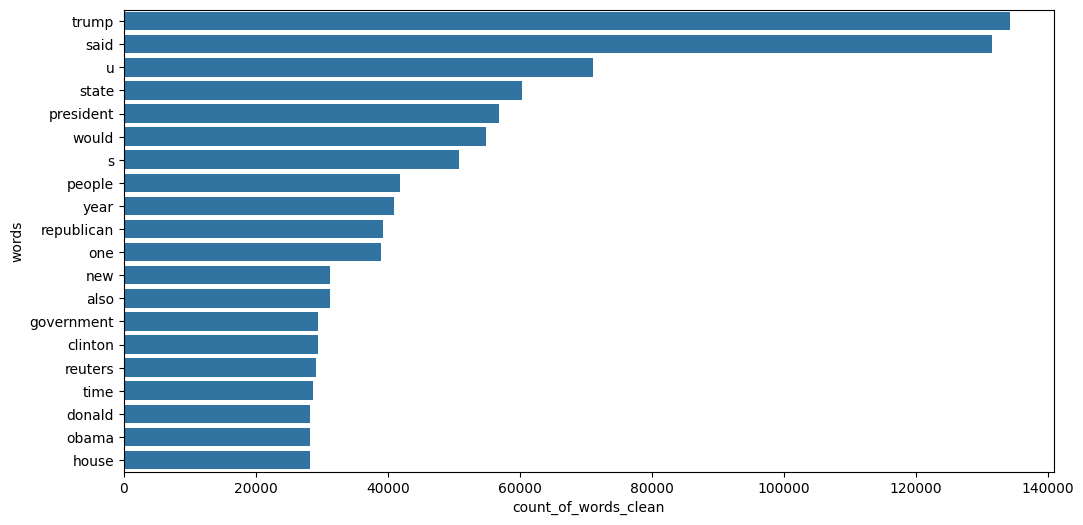

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=word_df_text_clean,y='words',x='count_of_words_clean')

In clean text Trump,said,u are the words with top count.

# Word cloud of clean text

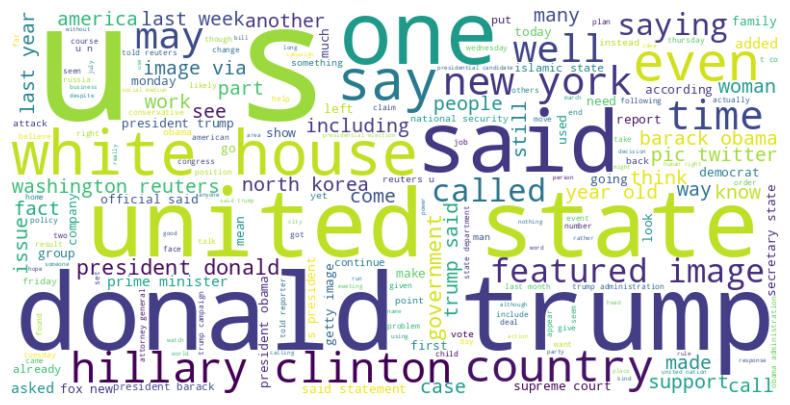

In [ ]:
text = " ".join(news['clean_text'])

#creating wordcloud object
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

#display wordcloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud , interpolation = "bilinear")
plt.axis("off")
plt.show()

In [ ]:
news

,title,text,subject,date,label,clean_text
0,Racist North Carolina Hospital Volunteer Lose...,Republicans claim that racism doesn t exist an...,News,"April 16, 2016",0,republican claim racism exist anymore . true s...
1,Weird: Ted Cruz Fantasizes About Spanking Hil...,Ted Cruz again showed that his campaign is wei...,News,"January 8, 2016",0,ted cruz showed campaign weirder previous cons...
2,U.S. military says airstrikes kill five al Qae...,WASHINGTON (Reuters) - The U.S. military said ...,worldnews,"December 8, 2017",1,washington reuters u.s. military said friday c...
3,German coalition watch: Merkel says compromise...,BERLIN (Reuters) - Chancellor Angela Merkel wo...,worldnews,"October 17, 2017",1,berlin reuters chancellor angela merkel fourth...
4,STUNNING DEVELOPMENT: OBAMA GIVES $75 MILLION ...,You have got to be kidding me! After all the t...,Government News,"Sep 17, 2016",0,got kidding time trump attacked democratic sid...
...,...,...,...,...,...,...
44893,DC Women’s March Aftermath: Streets Littered W...,21st Century Wire says So much for caring abou...,US_News,"January 23, 2017",0,st century wire say much caring environment in...
44894,WATCH: New Documentary Explores Trump’s Russi...,This past week the world has been hit with man...,News,"May 16, 2017",0,past week world hit many newsworthy story whit...
44895,SARAH SANDERS…She Doesn’t Have Time For THIS! ...,Sarah Sanders is great at getting the White Ho...,politics,"Dec 27, 2017",0,sarah sander great getting white house press c...
44896,Romney: It's 'disqualifying' for Trump not to ...,WASHINGTON (Reuters) - Former U.S. Republican ...,politicsNews,"May 11, 2016",1,washington reuters former u.s. republican pres...


# Data Preparation

In [ ]:
x = news['clean_text']
y = news['label']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.head()

,clean_text
7006,washington reuters u.s. president donald trump...
5223,shawn helton st century wirethe cozy relations...
40133,san francisco reuters federal appeal court mon...
24342,entire world aware donald trump spent morning ...
42302,washington reuters republican democratic leade...


## BOW

In [ ]:
vocab = CountVectorizer()
x_train_bow = vocab.fit_transform(x_train)
x_test_bow = vocab.transform(x_test)

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

## Model building

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9890355784291788

 Accuracy using Logistic Regression is 98%

In [ ]:
# train by using a Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB

NB = MultinomialNB()
NB.fit(xv_train, y_train)

MultinomialNB()

In [ ]:
NB_pred=NB.predict(xv_test)

In [ ]:
NB.score(xv_test, y_test)

0.9436115462072052

Accuracy using naive bayes is 94%

In [ ]:
#classification report fro naive bayes
print(classification_report(y_test, NB_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      4691
           1       0.95      0.93      0.94      4247

    accuracy                           0.94      8938
   macro avg       0.94      0.94      0.94      8938
weighted avg       0.94      0.94      0.94      8938

